In [1]:
import numpy as np
import rebound as rb
import sys


from matplotlib import pyplot as plt

# data read-in

In [2]:
savedir = "/fs/lustre/cita/hadden/06_free_floating_planets/03_simulations/"
fi_str = savedir+"{}_{}_counts_and_dE_vs_time.npy"
minq_fi_str = savedir+"{}_{}_tfin_max_dE_min_q.npy"
cross_time_fi_str = savedir+"{}_crossing_times.npy"
final_orb_str = savedir+"{}_{}_final_orbits.npy"
all_types = ("neptune","3neptune","saturn")

In [13]:
Nsim = lambda planet_type: 20 if planet_type=='j2neptune' else 100

final_time_max_dE_min_q = {pl_type:np.zeros((Nsim(pl_type),3)) for pl_type in all_types+("j2neptune",)}
count_data={}
crossing_times = {}
final_orbit_data = {pl_type:np.zeros((Nsim(pl_type),5,6)) for pl_type in all_types+("j2neptune",)}
for pl_type in all_types + ("j2neptune",):
    crossing_times[pl_type]=np.load(cross_time_fi_str.format(pl_type))
    data =[]
    
    for i in range(Nsim(pl_type)):
        final_orbit_data[pl_type][i] = np.load(final_orb_str.format(pl_type,i))
        t_cross =crossing_times[pl_type][i]
        final_time_max_dE_min_q[pl_type][i] = np.load(minq_fi_str.format(pl_type,i))
        x = np.load(fi_str.format(pl_type,i))
        x = x.astype(np.float64)
        x[1:,0] -= t_cross
        data.append(x)
    count_data[pl_type]=data

# Figure 1

inf neptune 100
inf 3neptune 88
inf saturn 100
0.01 neptune 68
0.01 3neptune 69
0.01 saturn 79


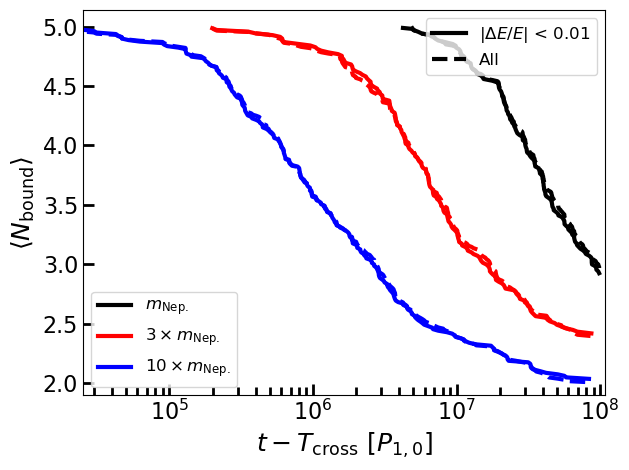

In [22]:
import numpy as np
import matplotlib.pyplot as plt


lbls = [r'$m_\mathrm{Nep.}$', r'$3 \times m_\mathrm{Nep.}$', r'$10 \times m_\mathrm{Nep.}$']
for Ecut, ls in ((np.inf, '--'), (0.01, '-')):
    for i, pl_type in enumerate(all_types):
        tfin, dE, min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krb'[i]
        data = count_data[pl_type]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)), dE < Ecut)
        all_times = np.concatenate([d[1:, 0] for q, d in zip(msk, data) if q])
        Nsys = np.sum(msk)
        print(Ecut, pl_type, Nsys)
        t_ej = np.sort(all_times)
        N_ej = len(t_ej)
        kwargs = {'ls': ls, 'color': color, 'lw': 3}
        if ls == '-':
            kwargs['label'] = lbls[i] #+ r", ({})".format(np.sum(msk))
        plt.plot(np.log10(t_ej), (5 * Nsys - np.arange(1, 1 + N_ej)) / Nsys, **kwargs)

# Adding the second legend for line styles
from matplotlib.lines import Line2D

line_styles = [Line2D([0], [0], color='black', lw=3, linestyle='-'),
               Line2D([0], [0], color='black', lw=3, linestyle='--')]

labels = [r'$|\Delta E /E|$ < 0.01', 'All']
first_legend = plt.legend(line_styles, labels, loc='upper right', fontsize=12)
plt.gca().add_artist(first_legend)

# Customize the x-ticks
xts = np.arange(5, 9)
plt.xticks(xts, labels=["$10^{{{}}}$".format(xt) for xt in xts])
plt.tick_params(direction='in', size=8, width=2, labelsize=16)
plt.tick_params(direction='in', size=6, width=2, which='minor')
plt.xticks(np.concatenate([np.log10(np.arange(2, 10)) + xt for xt in np.arange(4, 8)]), minor=True)

# Set limits and labels
plt.xlim(np.log10(2.5e4), np.log10(1.09e8))
plt.ylim(ymin=1.9)
plt.xlabel(r"$t-T_\mathrm{cross}~[P_{1,0}]$", fontsize=18)
plt.ylabel(r"$\langle N_\mathrm{bound} \rangle$", fontsize=18)

# Adding the original legend for the plot data
plt.legend(fontsize=12)
plt.tight_layout()

# Uncomment the line below to save the figure
plt.savefig("../02_figures/bound_vs_t.pdf")

# Show the plot
plt.show()


inf neptune 100
inf 3neptune 88
inf saturn 100
inf j2neptune 20
0.01 neptune 68
0.01 3neptune 69
0.01 saturn 79
0.01 j2neptune 15


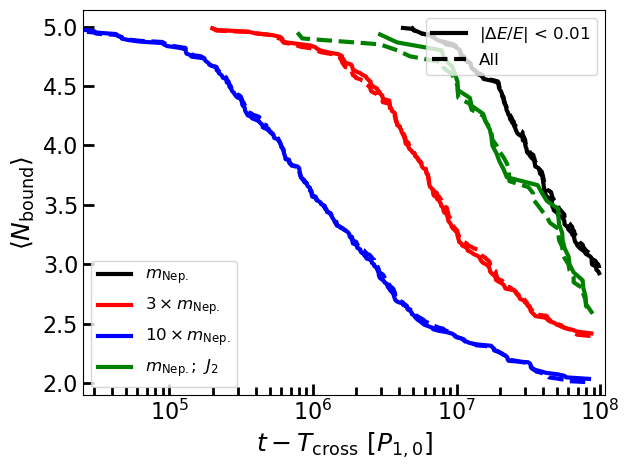

In [17]:
import numpy as np
import matplotlib.pyplot as plt


lbls = [r'$m_\mathrm{Nep.}$', r'$3 \times m_\mathrm{Nep.}$', r'$10 \times m_\mathrm{Nep.}$',r'$m_\mathrm{Nep.};~J_2$']
for Ecut, ls in ((np.inf, '--'), (0.01, '-')):
    for i, pl_type in enumerate(all_types+('j2neptune',)):
        tfin, dE, min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krbg'[i]
        data = count_data[pl_type]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)), dE < Ecut)
        all_times = np.concatenate([d[1:, 0] for q, d in zip(msk, data) if q])
        Nsys = np.sum(msk)
        print(Ecut, pl_type, Nsys)
        t_ej = np.sort(all_times)
        N_ej = len(t_ej)
        kwargs = {'ls': ls, 'color': color, 'lw': 3}
        if ls == '-':
            kwargs['label'] = lbls[i] #+ r", ({})".format(np.sum(msk))
        plt.plot(np.log10(t_ej), (5 * Nsys - np.arange(1, 1 + N_ej)) / Nsys, **kwargs)

# Adding the second legend for line styles
from matplotlib.lines import Line2D

line_styles = [Line2D([0], [0], color='black', lw=3, linestyle='-'),
               Line2D([0], [0], color='black', lw=3, linestyle='--')]

labels = [r'$|\Delta E /E|$ < 0.01', 'All']
first_legend = plt.legend(line_styles, labels, loc='upper right', fontsize=12)
plt.gca().add_artist(first_legend)

# Customize the x-ticks
xts = np.arange(5, 9)
plt.xticks(xts, labels=["$10^{{{}}}$".format(xt) for xt in xts])
plt.tick_params(direction='in', size=8, width=2, labelsize=16)
plt.tick_params(direction='in', size=6, width=2, which='minor')
plt.xticks(np.concatenate([np.log10(np.arange(2, 10)) + xt for xt in np.arange(4, 8)]), minor=True)

# Set limits and labels
plt.xlim(np.log10(2.5e4), np.log10(1.09e8))
plt.ylim(ymin=1.9)
plt.xlabel(r"$t-T_\mathrm{cross}~[P_{1,0}]$", fontsize=18)
plt.ylabel(r"$\langle N_\mathrm{bound} \rangle$", fontsize=18)

# Adding the original legend for the plot data
plt.legend(fontsize=12)
plt.tight_layout()

# Uncomment the line below to save the figure
#plt.savefig("../02_figures/bound_vs_t.pdf")

# Show the plot
plt.show()


inf neptune 100
inf 3neptune 88
inf saturn 100
0.01 neptune 68
0.01 3neptune 69
0.01 saturn 81


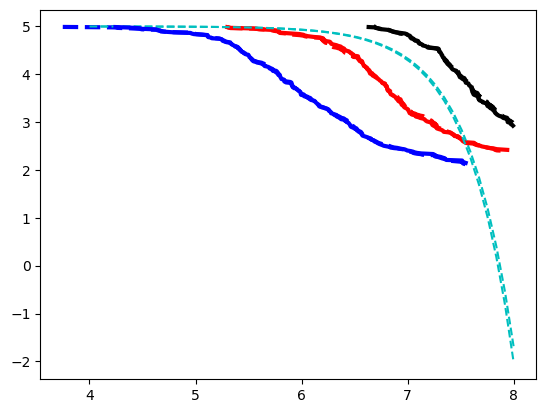

In [47]:
for Ecut, ls in ((np.inf, '--'), (0.01, '-')):
    for i, pl_type in enumerate(all_types):
        tfin, dE, min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krb'[i]
        data = count_data[pl_type]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)), dE < Ecut)
        all_times = np.concatenate([d[1:, 0] for q, d in zip(msk, data) if q])
        Nsys = np.sum(msk)
        print(Ecut, pl_type, Nsys)
        t_ej = np.sort(all_times)
        N_ej = len(t_ej)
        kwargs = {'ls': ls, 'color': color, 'lw': 3}
        if ls == '-':
            kwargs['label'] = lbls[i] + r", ({})".format(np.sum(msk))
        xdata,ydata = np.log10(t_ej), (5 * Nsys - np.arange(1, 1 + N_ej)) / Nsys
        plt.plot(xdata,ydata, **kwargs)
        if i==1:
            t = 10**(xdata)
            f = lambda t,a,tau1,tau2: 2 + (a) * np.exp(-t/tau1) + (3-a) *np.exp(-t/tau2)
            pbest,_ = curve_fit(f,t,ydata,(2,1e8,3e8))
            tplot = np.logspace(4,8)
            plt.plot(np.log10(tplot),f(tplot,*pbest),'c--')
            #plt.plot(np.log10(tplot),f(tplot,pbest[0] * (3)**2),'c--')
            #plt.plot(np.log10(tplot),f(tplot,pbest[0] * (3/10)**2),'c--')

# q figure

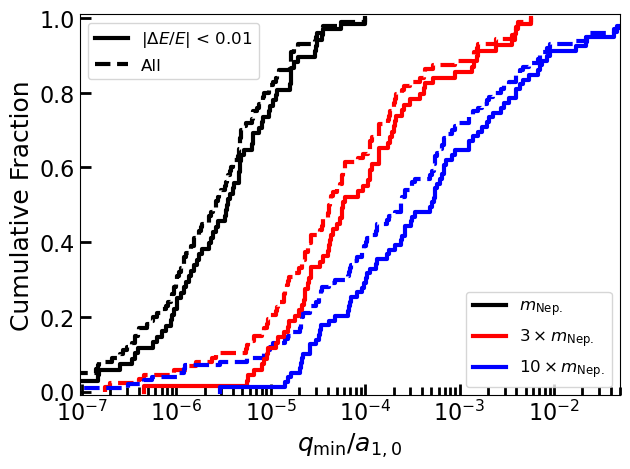

In [18]:
lbls = [r'$m_\mathrm{Nep.}$',r'$3 \times m_\mathrm{Nep.}$',r'$10 \times m_\mathrm{Nep.}$']
for Ecut,ls in ((np.inf,'--'),(0.01,'-')):
    for i,pl_type in enumerate(all_types):
        tfin,dE,min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krb'[i]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)),dE<Ecut)
        xdata = np.sort(np.log10(min_q[msk]))
        N = len(xdata)
        ydata1 = np.arange(N)/N
        ydata2 = np.arange(1,N+1)/N
        XY = np.array([((x,y1),(x,y2)) for x,y1,y2 in zip(xdata,ydata1,ydata2)])
        xplot,yplot = np.transpose(XY.reshape(-1,2))
        kwargs={'ls':ls,'color':color,'lw':3}
        if ls=='-':
            kwargs['label'] = lbls[i] #+ r", ({})".format(np.sum(msk))

        plt.plot(xplot,yplot,**kwargs)



# Adding the second legend for line styles
from matplotlib.lines import Line2D

line_styles = [Line2D([0], [0], color='black', lw=3, linestyle='-'),
               Line2D([0], [0], color='black', lw=3, linestyle='--')]

labels = [r'$|\Delta E /E|$ < 0.01', 'All']
first_legend = plt.legend(line_styles, labels, loc='upper left', fontsize=12)
plt.gca().add_artist(first_legend)

# Customize the x-ticks
xts = np.arange(-7, 0)
plt.xticks(xts, labels=["$10^{{{}}}$".format(xt) for xt in xts])
plt.tick_params(direction='in', size=8, width=2, labelsize=16)
plt.tick_params(direction='in', size=6, width=2, which='minor')
plt.xticks(
    np.concatenate([np.log10(np.arange(2,10)) + xt for xt in np.arange(-7,-1)]),
    minor=True
);

# Set limits and labels
plt.xlim(np.log10(0.95e-7),np.log10(0.5e-1))
plt.ylim(-0.01,1.01)
plt.xlabel(r"$q_\mathrm{min}/a_{1,0}$",fontsize=18)
plt.ylabel(r"Cumulative Fraction",fontsize=18)

# Adding the original legend for the plot data
plt.legend(fontsize=12,loc='lower right')
plt.tight_layout()


plt.savefig("../02_figures/qmin.pdf")
# Uncomment the line below to save the figure
#plt.savefig("../02_figures/bound_vs_t.pdf")


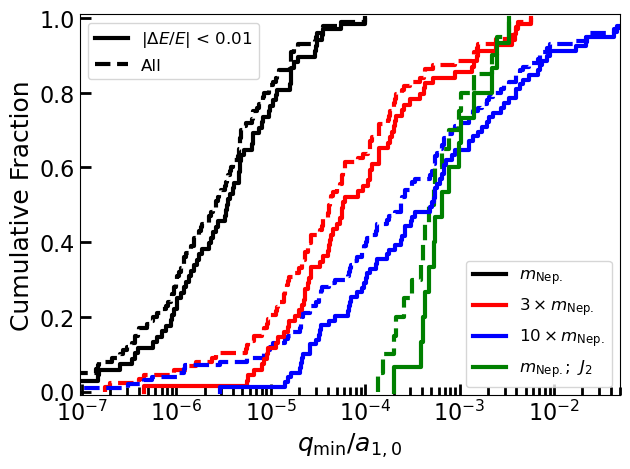

In [19]:
lbls = [r'$m_\mathrm{Nep.}$',r'$3 \times m_\mathrm{Nep.}$',r'$10 \times m_\mathrm{Nep.}$']
lbls+=[r'$m_\mathrm{Nep.};~J_2$']
for Ecut,ls in ((np.inf,'--'),(0.01,'-')):
    for i,pl_type in enumerate(all_types+('j2neptune',)):
        tfin,dE,min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krbg'[i]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)),dE<Ecut)
        xdata = np.sort(np.log10(min_q[msk]))
        N = len(xdata)
        ydata1 = np.arange(N)/N
        ydata2 = np.arange(1,N+1)/N
        XY = np.array([((x,y1),(x,y2)) for x,y1,y2 in zip(xdata,ydata1,ydata2)])
        xplot,yplot = np.transpose(XY.reshape(-1,2))
        kwargs={'ls':ls,'color':color,'lw':3}
        if ls=='-':
            kwargs['label'] = lbls[i] #+ r", ({})".format(np.sum(msk))

        plt.plot(xplot,yplot,**kwargs)



# Adding the second legend for line styles
from matplotlib.lines import Line2D

line_styles = [Line2D([0], [0], color='black', lw=3, linestyle='-'),
               Line2D([0], [0], color='black', lw=3, linestyle='--')]

labels = [r'$|\Delta E /E|$ < 0.01', 'All']
first_legend = plt.legend(line_styles, labels, loc='upper left', fontsize=12)
plt.gca().add_artist(first_legend)

# Customize the x-ticks
xts = np.arange(-7, 0)
plt.xticks(xts, labels=["$10^{{{}}}$".format(xt) for xt in xts])
plt.tick_params(direction='in', size=8, width=2, labelsize=16)
plt.tick_params(direction='in', size=6, width=2, which='minor')
plt.xticks(
    np.concatenate([np.log10(np.arange(2,10)) + xt for xt in np.arange(-7,-1)]),
    minor=True
);

# Set limits and labels
plt.xlim(np.log10(0.95e-7),np.log10(0.5e-1))
plt.ylim(-0.01,1.01)
plt.xlabel(r"$q_\mathrm{min}/a_{1,0}$",fontsize=18)
plt.ylabel(r"Cumulative Fraction",fontsize=18)

# Adding the original legend for the plot data
plt.legend(fontsize=12,loc='lower right')
plt.tight_layout()



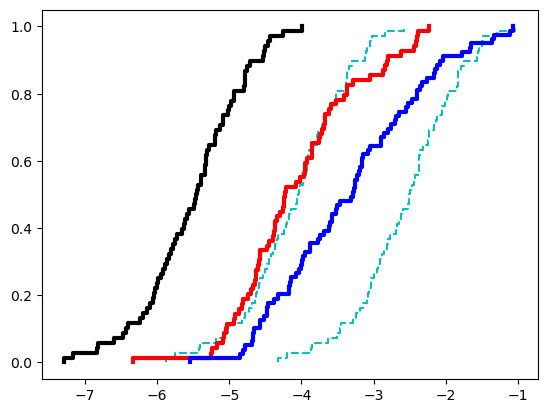

In [20]:
Ecut,ls=(0.01,'-')
for i,pl_type in enumerate(all_types):
    tfin,dE,min_q = np.transpose(final_time_max_dE_min_q[pl_type])
    tcross = crossing_times[pl_type]
    color = 'krb'[i]
    msk = np.logical_and(np.logical_not(np.isnan(tcross)),dE<Ecut)
    xdata = np.sort(np.log10(min_q[msk]))
    N = len(xdata)
    ydata1 = np.arange(N)/N
    ydata2 = np.arange(1,N+1)/N
    XY = np.array([((x,y1),(x,y2)) for x,y1,y2 in zip(xdata,ydata1,ydata2)])
    xplot,yplot = np.transpose(XY.reshape(-1,2))
    kwargs={'ls':ls,'color':color,'lw':3}
    plt.plot(xplot,yplot,**kwargs)
    if i==0:
        plt.plot(xplot+(9/7)*np.log(3),yplot,ls='--',color='c')
        plt.plot(xplot+(9/7)*np.log(10),yplot,ls='--',color='c')

# $\langle  r \rangle$ figure

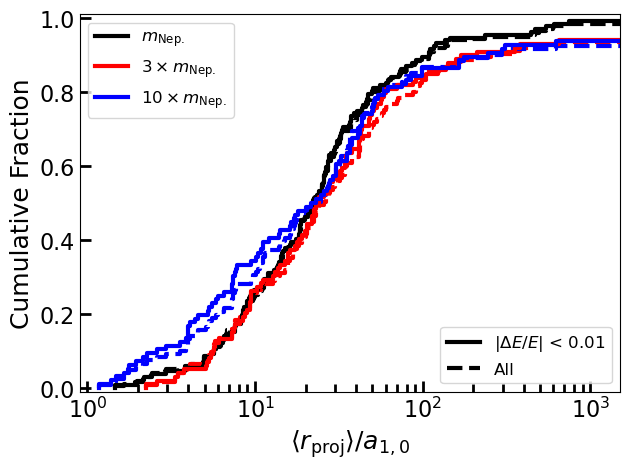

In [21]:
#(np.inf,'--')
lbls = [r'$m_\mathrm{Nep.}$',r'$3 \times m_\mathrm{Nep.}$',r'$10 \times m_\mathrm{Nep.}$']
for Ecut,ls in ((np.inf,'--'),(0.01,'-')):
    for i,pl_type in enumerate(all_types):
        tfin,dE,min_q = np.transpose(final_time_max_dE_min_q[pl_type])
        tcross = crossing_times[pl_type]
        color = 'krb'[i]
        msk = np.logical_and(np.logical_not(np.isnan(tcross)),dE<Ecut)
        final_orbits = final_orbit_data[pl_type][msk]
        final_a = final_orbits[:,:,0]
        final_e = final_orbits[:,:,1]
        rproj = []
        for a,e in zip(final_a,final_e):
            a1 = a[a>0]
            e1 = e[a>0]
            ia = np.argsort(a1)
            rproj.append(0.25 * np.pi * a1[ia[1:]] * (1 + 0.5 * e1[ia[1:]]**2))
        rproj = np.concatenate(rproj)        
        xdata = np.sort(np.log10(rproj))
        N=len(xdata)
        ydata1 = np.arange(N)/N
        ydata2 = np.arange(1,N+1)/N
        XY = np.array([((x,y1),(x,y2)) for x,y1,y2 in zip(xdata,ydata1,ydata2)])
        xplot,yplot = np.transpose(XY.reshape(-1,2))
        kwargs={'ls':ls,'color':color,'lw':3}
        if ls=='-':
            kwargs['label'] = lbls[i] #+ r", ({})".format(np.sum(msk))
        plt.plot(xplot,yplot,**kwargs)
plt.legend()

# Adding the second legend for line styles
from matplotlib.lines import Line2D

line_styles = [Line2D([0], [0], color='black', lw=3, linestyle='-'),
               Line2D([0], [0], color='black', lw=3, linestyle='--')]

labels = [r'$|\Delta E /E|$ < 0.01', 'All']
first_legend = plt.legend(line_styles, labels, loc='lower right', fontsize=12)
plt.gca().add_artist(first_legend)


xts = np.arange(0,7)
plt.xticks(xts,labels = ["$10^{{{}}}$".format(xt) for xt in xts])
plt.tick_params(direction='in',size=8,width=2,labelsize=16)
plt.tick_params(direction='in',size=6,width=2,which='minor')
plt.xticks(
    np.concatenate([np.log10(np.arange(2,10)) + xt for xt in np.arange(0,6)]),
    minor=True
);
plt.xlim(np.log10(0.9),np.log10(1.5e3))
plt.ylim(-0.01,1.01)
plt.xlabel(r"$\langle r_\mathrm{proj} \rangle /a_{1,0}$",fontsize=18)
plt.ylabel(r"Cumulative Fraction",fontsize=18)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("../02_figures/rproj.pdf")

# scratch 

In [15]:
archive_fi_str = '/fs/lustre/cita/hadden/06_free_floating_planets/03_simulations/five_{}_sim_{}.sa'
sa = rb.Simulationarchive(archive_fi_str.format('neptune',10))

In [17]:
Nout = 2048
times = np.linspace(sa.tmin,sa.tmax,Nout)
times_done = np.zeros(Nout)
orbits = np.zeros((5,6,Nout))
specific_ang_mo = np.zeros((5,Nout))
for i,sim in enumerate(sa.getSimulations(times)):
    times_done[i] = sim.t
    for j,o in enumerate(sim.orbits(primary=sim.particles[0])):
        orbits[j,:,i]=o.a,o.e,o.inc,o.M,o.omega,o.Omega
        specific_ang_mo[j,i]=o.h

(0.01, 1000.0)

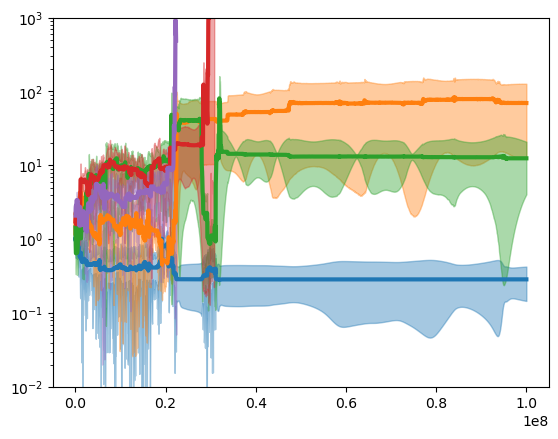

In [18]:
for j in range(5):
    a = orbits[j,0]
    e = orbits[j,1]
    q = a * (1-e)
    Q = a * (1+e)
    msk=a>0
    l,=plt.plot(times_done[msk],a[msk],lw=3)
    plt.fill_between(times_done[msk],q[msk],Q[msk],color=l.get_color(),alpha=0.4)
plt.yscale('log')
plt.ylim(1e-2,1e3)

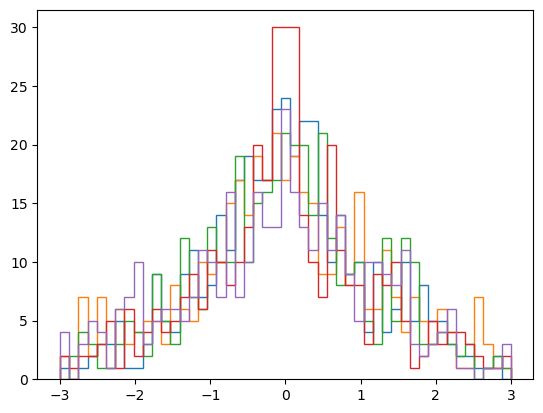

In [19]:
T=times_done[1:]
for i in range(5):
    dh = (specific_ang_mo[i][1:]-specific_ang_mo[i][:-1])
    plt.hist(dh[T<0.2e8],bins=np.linspace(-3,3),histtype='step');